# Emotion Detection


 **Importing Libraries**


In [1]:
import matplotlib.pyplot as plt 
import sys
sys.path.append('C:\\Python311\\Lib\\site-packages')
from glob import glob 
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.12.0


**Exploring Dataset**

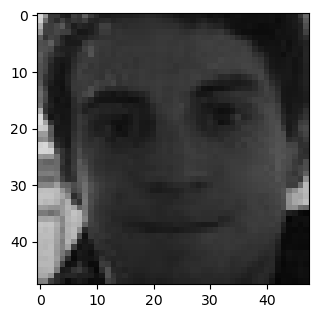

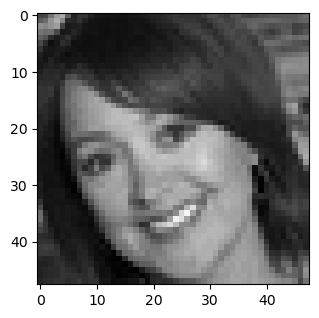

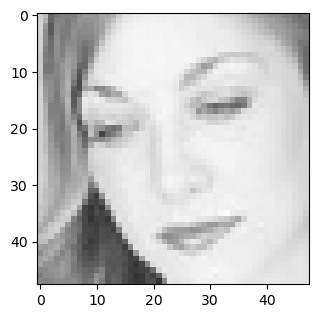

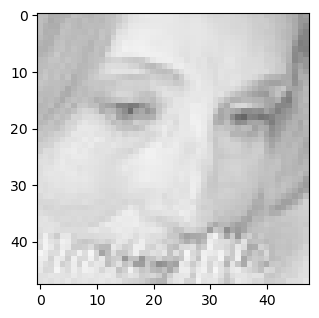

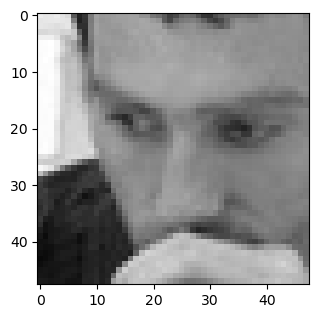

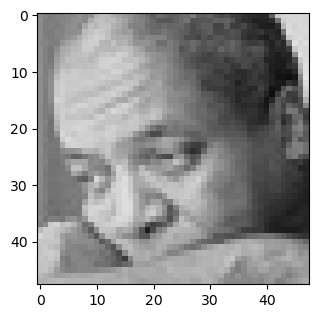

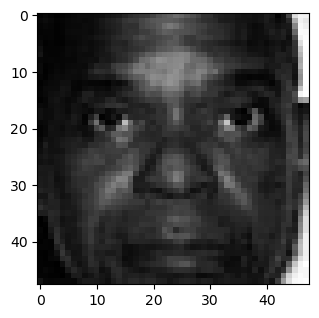

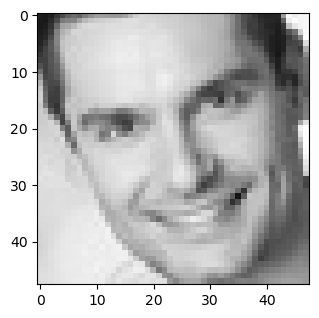

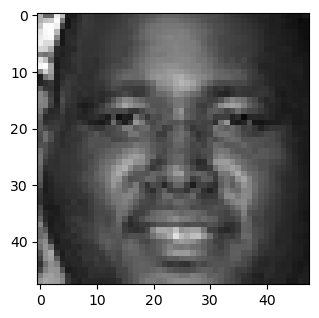

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));

**Preparing Data for Training**

In [3]:
img_size =48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", target_size = (img_size,img_size),
                                                     color_mode = "grayscale",
                                                     batch_size = batch_size,
                                                     class_mode = "categorical",
                                                     shuffle = True)
datagen_calidation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/", target_size = (img_size,img_size),
                                                     color_mode = "grayscale",
                                                     batch_size = batch_size,
                                                     class_mode = "categorical",
                                                     shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [4]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size,padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_for(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'],optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [7]:
model = model_for((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

**Initializing the Model**

In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max',verbose =1)
callbacks = [checkpoint]

# Training the Model

**The next cell takes time to complete**

In [11]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 0.8713 - accuracy: 0.6852
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 186s 414ms/step - loss: 0.8713 - accuracy: 0.6852 - val_loss: 1.6483 - val_accuracy: 0.4389
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.7303
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 184s 410ms/step - loss: 0.7545 - accuracy: 0.7303 - val_loss: 1.6498 - val_accuracy: 0.4747
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 0.6383 - accuracy: 0.7722
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 182s 405ms/step - loss: 0.6383 - accuracy: 0.7722 - val_loss: 1.7298 - val_accuracy: 0.4283
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 0.5426 - accuracy: 0.8131
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 

**Model Evaluation**

In [13]:
model.evaluate(validation_generator)

113/113 [==============================] - 12s 102ms/step - loss: 2.2523 - accuracy: 0.5029


[2.2523179054260254, 0.5029256343841553]

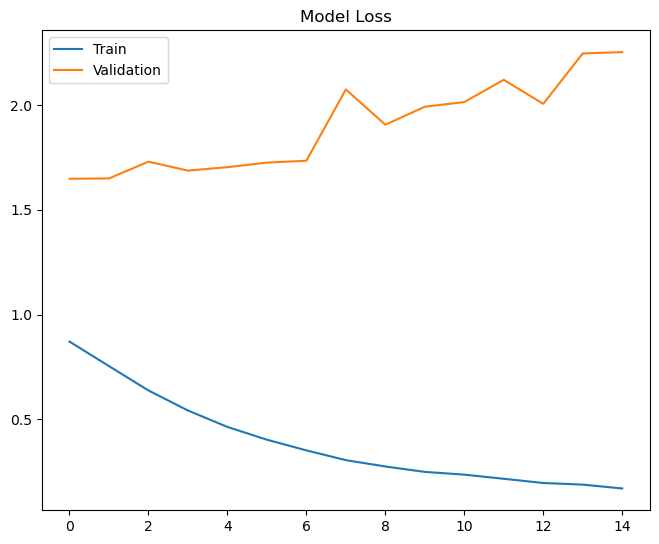

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top = 1.0,bottom = 0.0,right =0.95,left = 0.0,hspace = 0.25,wspace = 0.35)

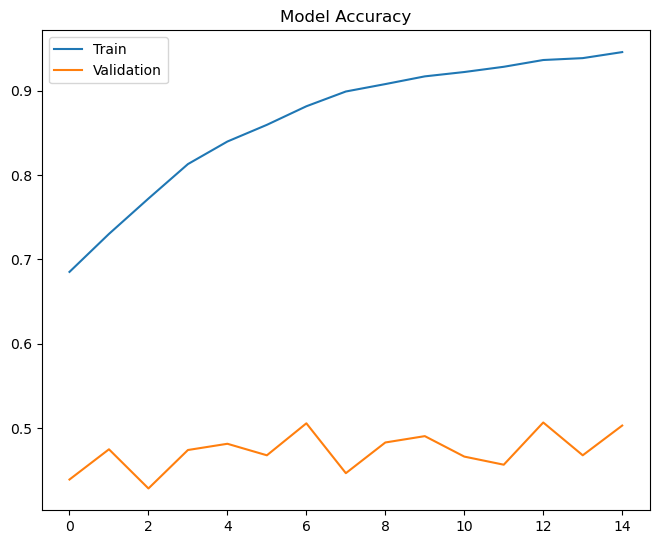

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top = 1.0,bottom = 0.0,right =0.95,left = 0.0,hspace = 0.25,wspace = 0.35)

In [16]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)